In [128]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import glob
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

list_of_files = glob.glob('./data/*')
latest_file = max(list_of_files, key=os.path.getctime)
file_path = latest_file

# Read the text file into a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract force and angle values from the lines
force_values = []
angle_values = []
for line in lines:
    if line.startswith('force'):
        force_values.append(float(line.split(': ')[1]))
    elif line.startswith('angle'):
        angle_values.append(float(line.split(': ')[1]))

# Create a dataframe from the extracted values
df = pd.DataFrame({'force': force_values, 'angle': angle_values})
df['force'] = df['force']*9.81

radius_fixed = 0.377
radius_swing = 0.377
df['dist'] = np.sqrt(radius_fixed**2 + radius_swing**2 - 2*radius_fixed*radius_swing*np.cos(np.radians(-df['angle'])))


trimmed_df = df[(np.abs(df['angle'] - trim_mean(df['angle'], 0.01)) / df['angle'].std() < 3)]
trimmed_df = trimmed_df.reset_index(drop=True)


# trimmed_df[:2000].plot('dist', 'force')

fig, ax = plt.subplots()

@interact(start_index=IntSlider(min=0, max=len(trimmed_df)-1, step=1, value=0),
          end_index=IntSlider(min=0, max=len(trimmed_df)-1, step=1, value=len(trimmed_df)-1))
def display_image(start_index, end_index):
    if(start_index >= end_index):
        return
    
    ax.clear()
    ax.set_xlabel('displacement (m)')
    ax.set_ylabel('force (N)')
    ax.plot(trimmed_df['dist'][start_index:end_index], trimmed_df['force'][start_index:end_index])

    objective_values = np.array([-trimmed_df['dist'][start_index:end_index], trimmed_df['force'][start_index:end_index]]).T

    pareto_front = []
    for i, (obj_val) in enumerate(objective_values):
        if all(np.any(obj_val <= objective_values[:], axis=1)):
            pareto_front.append(obj_val)
    pareto_front = np.array(pareto_front)
    pareto_front[:, 0] *= -1
    pareto_front = np.array(sorted(pareto_front, key=lambda x: x[0]))

    ax.fill_between(pareto_front.T[0], pareto_front.T[1], np.zeros_like(pareto_front.T[1]), color='lightblue', alpha=0.3)

    area_under_pareto_front = np.trapz(pareto_front.T[1], pareto_front.T[0])
    # print(area_under_pareto_front)
    ax.set_title(f"Area: {area_under_pareto_front}")


    plt.show()


interactive(children=(IntSlider(value=0, description='start_index', max=2939), IntSlider(value=2939, descripti…

0.5227225698505771


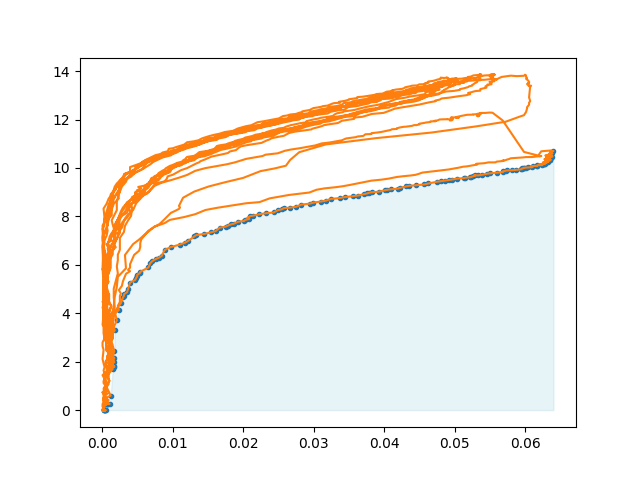

In [123]:
start_index = 0
end_index = 2700

objective_values = np.array([-trimmed_df['dist'][start_index:end_index], trimmed_df['force'][start_index:end_index]]).T
# objective_values = np.array([[0,-1,-2], [0,1,1]]).T #test, area should be 1.5

# Dominance check
pareto_front = []
for i, (obj_val) in enumerate(objective_values):
    if all(np.any(obj_val <= objective_values[:], axis=1)):
        pareto_front.append(obj_val)

pareto_front = np.array(pareto_front)
pareto_front[:, 0] *= -1
pareto_front = np.array(sorted(pareto_front, key=lambda x: x[0]))

area_under_pareto_front = np.trapz(pareto_front.T[1], pareto_front.T[0])
print(area_under_pareto_front)

plt.figure()
plt.plot(pareto_front.T[0], pareto_front.T[1], '.')
plt.plot(trimmed_df['dist'][start_index:end_index], trimmed_df['force'][start_index:end_index])
plt.fill_between(pareto_front.T[0], pareto_front.T[1], np.zeros_like(pareto_front.T[1]), color='lightblue', alpha=0.3)




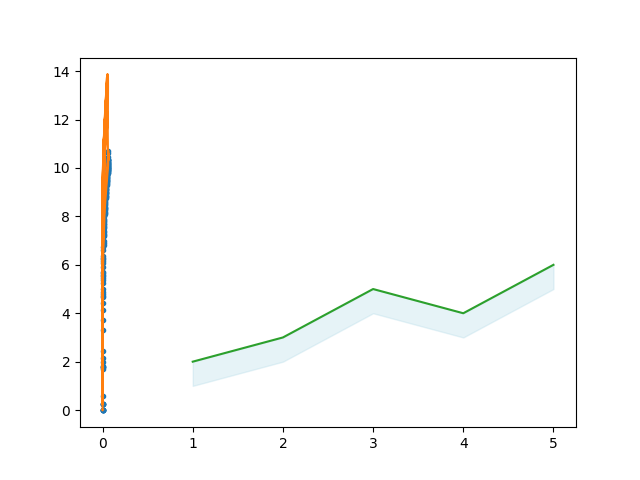

In [96]:
import matplotlib.pyplot as plt

# Assuming x_values and y_values represent the curve
x_values = [1, 2, 3, 4, 5]
y_values = [2, 3, 5, 4, 6]

# Assuming x_polygon and y_polygon represent the polygon vertices
x_polygon = [1, 2, 3, 4, 5]
y_polygon = [1, 2, 4, 3, 5]

# Plot the curve
plt.plot(x_values, y_values, label='Curve')

# Fill the area underneath the curve with a polygon
plt.fill_between(x_values, y_values, y_polygon, color='lightblue', alpha=0.3)

# Show the plot
plt.show()